In [17]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import talib as ta
import yfinance as yf
from datetime import datetime, timedelta

In [18]:
# Download NLTK data (if not already downloaded)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\smrc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
os.chdir('../scripts/')
import load_data as ld
data_path="C:/Users/smrc/Documents/Github/raw_analyst_ratings.csv"
result = ld.load_data(data_path)
data = result[0]
print(data.head())

result[1]

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']

In [45]:
result[2]

1407328

### Task 1: EDA and Sentiment Analysis 

In [52]:
# Loading financial news data
news_data = pd.read_csv("C:/Users/smrc/Documents/Github/raw_analyst_ratings.csv")
news_data = news_data.loc[:, ~news_data.columns.str.contains('^Unnamed')]
print(news_data.columns.tolist())

['headline', 'url', 'publisher', 'date', 'stock']


In [53]:
news_data.shape


(1407328, 5)

In [54]:
news_data.info

<bound method DataFrame.info of                                                   headline  \
0                  Stocks That Hit 52-Week Highs On Friday   
1               Stocks That Hit 52-Week Highs On Wednesday   
2                            71 Biggest Movers From Friday   
3             46 Stocks Moving In Friday's Mid-Day Session   
4        B of A Securities Maintains Neutral on Agilent...   
...                                                    ...   
1407323             Top Narrow Based Indexes For August 29   
1407324  Recap: Wednesday's Top Percentage Gainers and ...   
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326  Oppenheimer Initiates China Zenix At Outperfor...   
1407327  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \
0        https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1        https://www.benzinga.com/news/20/06/16170189/s...  B

In [58]:
# 1. Descriptive Statistics
news_data['headline_length'] = news_data['headline'].apply(len)
'''
adding extra column named headline_length to identify the length of each column
'''

news_data.head()


,headline,url,publisher,date,stock,headline_length
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [59]:
print(news_data['headline_length'].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


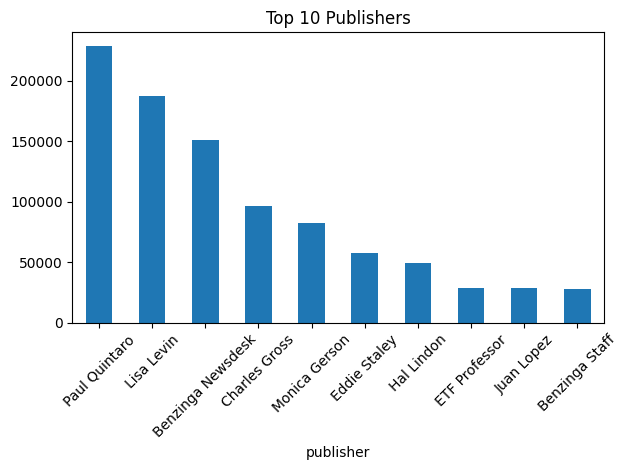

In [64]:
top_publishers = news_data['publisher'].value_counts().head(10)
print(top_publishers)
top_publishers.plot(kind='bar', title='Top 10 Publishers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [65]:
news_data['publisher'].value_counts().describe()

count      1034.000000
mean       1361.052224
std       11501.954263
min           1.000000
25%           3.000000
50%          11.000000
75%          93.500000
max      228373.000000
Name: count, dtype: float64

In [70]:
news_data['publisher'].value_counts().tail(20)

publisher
Joseph Trevisani                   1
Alex Roslin                        1
Economic Burn                      1
joreal2479                         1
Hasan Saleem                       1
Vuru                               1
The Professor                      1
Allan Farley                       1
Bruno del Ama                      1
CannabisFN                         1
Brian Dolan                        1
Happy Trading                      1
Howie Bick                         1
MelissaBurns                       1
Growth Aces                        1
Shazir Mucklai - Imperium Group    1
Laura Jennings                     1
Eric Martin                        1
Jose Rodrigo                       1
Jeremie Capron                     1
Name: count, dtype: int64

In [10]:
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')
news_data['date'] = news_data['date'].dt.tz_localize(None)  


publication_trends = news_data.groupby(news_data['date'].dt.to_period('D')).size()
print(publication_trends)

"""
line-1 converts publication dates to a Pandas datetime object.
line-2 Removes timezone information if present
Use df['date'].value_counts() or groupby to analyze trends.
"""

date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Freq: D, Length: 2528, dtype: int64


"\nline-1 converts publication dates to a Pandas datetime object.\nline-2 Removes timezone information if present\nUse df['date'].value_counts() or groupby to analyze trends.\n"

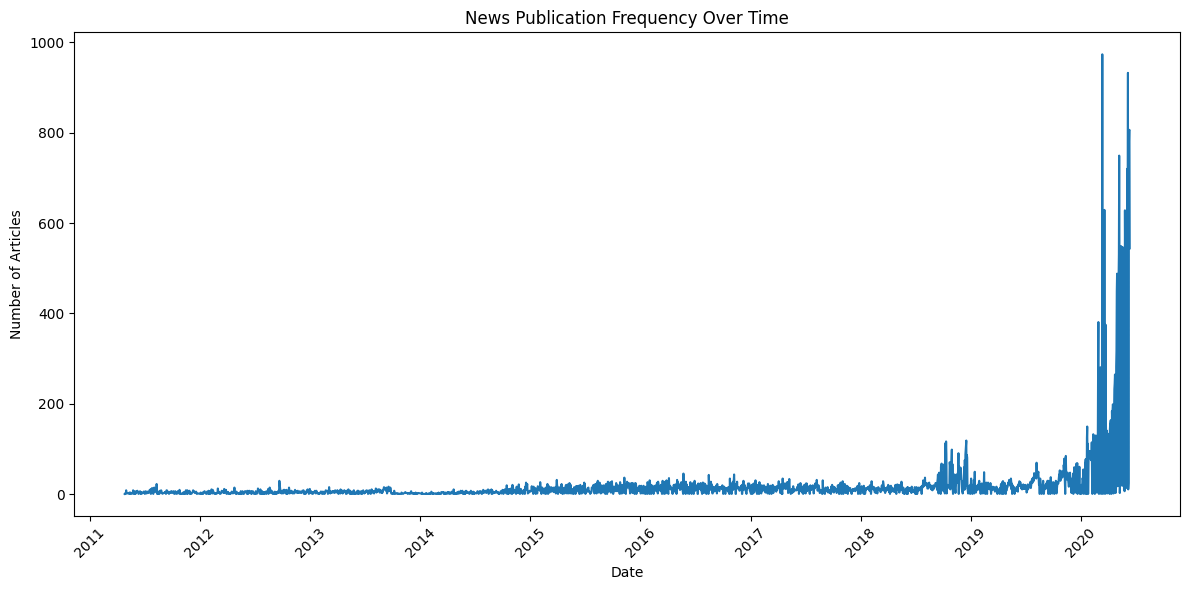

In [11]:
# 3. Time Series Analysis (Example)
news_data['date_only'] = news_data['date'].dt.date
daily_news_count = news_data.groupby('date_only')['headline'].count()
plt.figure(figsize=(12, 6))
plt.plot(daily_news_count.index, daily_news_count.values)
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('News Publication Frequency Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

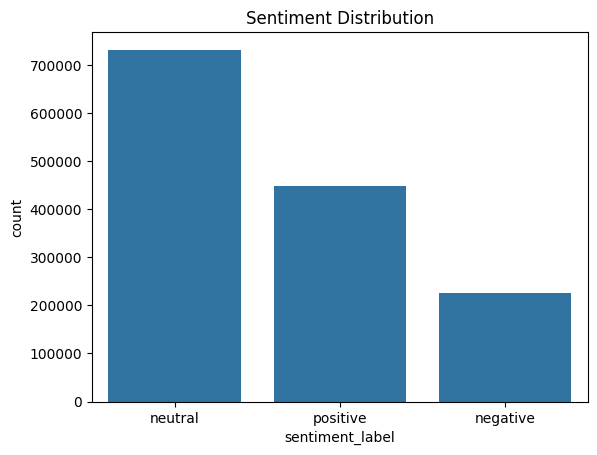

In [74]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

'''
1. Calculate Compound Sentiment Score:
Apply sentiment analysis to each headline in the 'news_data' DataFrame.
The lambda function extracts the 'compound' score from the polarity_scores dictionary.
The 'compound' score is a normalized, overall sentiment score ranging from -1 (most negative) to 1 (most positive).
'''
news_data['sentiment'] = news_data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

'''
2. Classify Sentiment Labels:
Categorize each headline based on its compound sentiment score.
Headlines with a positive compound score are labeled 'positive'.
Headlines with a negative compound score are labeled 'negative'.
Headlines with a compound score of 0 are labeled 'neutral'.
'''
news_data['sentiment_label'] = news_data['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

'''
3. Visualize Sentiment Distribution:
Create a countplot using seaborn to visualize the distribution of sentiment labels.
The plot shows the number of headlines classified as 'positive', 'negative', and 'neutral'.
'''
sns.countplot(data=news_data, x='sentiment_label')
plt.title('Sentiment Distribution')
plt.show()


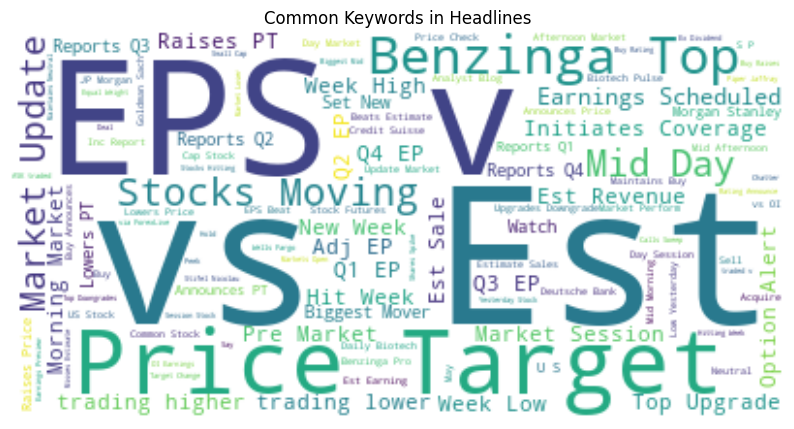

In [78]:
from wordcloud import WordCloud, STOPWORDS

'''
Join all the headlines in the 'news_df' DataFrame into a single string.
'''
text = " ".join(news_data['headline'])
stopwords = set(STOPWORDS)

'''
Create a set of stopwords using the STOPWORDS list from the wordcloud library.
Create a WordCloud object with specified parameters
Display Word Cloud
'''
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Keywords in Headlines")
plt.show()
